# Workflow

En esta práctica vamos a aplicar lo aprendido en esta asignatura para crear un flujo que automatice la descarga, análisis y publicación de los datos utilizando distintas herramientas como Zenodo, github y librerías de python para el análisis de datos

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
```

### Elementos necesarios
* Al menos un fichero CSV
* Un script de análisis de datos en CSV (Publicado en Github)


# Publicación de datos iniciales

Utilizando Zenodo, de forma manual, publicar los datos que se vayan a utilizar.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Utilizar Communities para localizar más facilmente los datos</p>
</div>


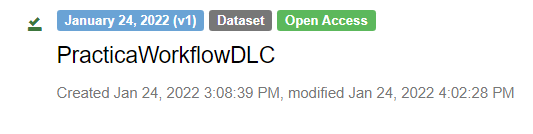

# Publicación de script de Análisis

En Github + Zenodo

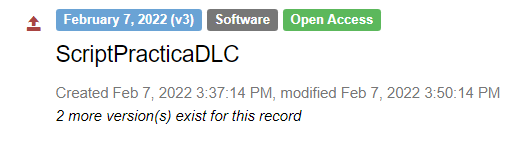

Ambos archivos han sido subidos a Zenodo, en la comunidad llamada PracticaWorkflowDLC, con identificador `id = practicaworkflowdlc`

# Descarga de datos

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

Pista: url+'?verb=ListRecords&set=nombre_set

In [1]:
import requests
import json
import csv
from datetime import datetime
import xml.etree.cElementTree as ET

Un par de funciones para búsqueda

In [2]:
def search_dataset(url,oai_set,metadata_format):
    """Search the datasets identifiers in the defined set
        Parameters
        ----------
        url : string
            OAI-PMH endpoint url
        oai_set : string
            OAI-PMH set where the datasets will be searched
        metadata_format : string
            Selected metadata format to search
        Returns
        -------
        dataset_ids : array 
            Dataset IDs
    """
    #Define bounds to search in specific set
    bounds = "&set="+oai_set
    oai = requests.get(url+'?verb=ListRecords&metadataPrefix='+metadata_format+bounds)

    oaiTree = ET.ElementTree(ET.fromstring(oai.text.encode('utf-8')))
    item = oaiTree.findall('.//{http://datacite.org/schema/kernel-3}identifier')
    return item

In [3]:
def get_oai_metadata_formats(url):
    """Lists the available metadata formats
        Parameters
        ----------
        url : string
            OAI-PMH endpoint url
        Returns
        -------
        metadata_formats : 
            Name of the downloaded file(s).
    """
    metadata_formats = []
    oai_verb = '?verb=ListMetadataFormats'
    oai = requests.get(url + oai_verb) #Peticion al servidor
    xmlTree = ET.ElementTree(ET.fromstring(oai.text))
    iterator = xmlTree.iter()
    for elem in iterator:
        if (elem.tag == '{http://www.openarchives.org/OAI/2.0/}metadataPrefix'):
            metadata_formats.append(elem.text)
    return metadata_formats

In [4]:
def check_dataset(ids,api_url,tipo):
    """Checks if the available datasets satisfy the dates and location req
        Parameters
        ----------
        ids : array
            List of dataset ids
        api_url : string
            API to get dataset metadata
        tipo : string
            type of file to download
        Returns
        -------
        downloaded_datasets : array 
            List of downloaded datasets
    """
    file_list = []
    for i in ids:
        headers = {'accept': 'application/json'}
        #TODO Manage different types of identifiers (i.text.replace('record', 'api/records'),headers))
        r = requests.get('https://doi.org/'+i.text,headers)
        r = requests.get(r.url.replace('record', 'api/records'),headers)
        for u in r.json()['files']:
            print("Type found: %s" % u['type'])
            if u['type'] == tipo:
                print(u['links']['self'])
                link = u['links']['self']
                file_name = u["key"].replace('/','_')
                with open(file_name, "wb") as f:
                    print("Downloading %s" % file_name)
                    response = requests.get(link, stream=True)
                    total_length = response.headers.get('content-length')

                    if total_length is None: # no content length header
                        f.write(response.content)
                    else:
                        dl = 0
                        total_length = int(total_length)
                        for data in response.iter_content(chunk_size=4096):
                            dl += len(data)
                            f.write(data)
                            done = int(50 * dl / total_length)
                            sys.stdout.write("\r[%s%s]" % ('=' * done, ' ' * (50-done)) )    
                            sys.stdout.flush()
                file_list.append(file_name)
                print("Download complete")     
                                
    return file_list

Busco el dataset

In [5]:
import sys
#Searching datasets OAI-PMH
print("Searching datasets OAI-PMH")
oai_url = 'https://zenodo.org/oai2d'
metadata_formats = get_oai_metadata_formats(oai_url)

#TODO hardcoded
print("Searching Datasets")
oai_set = 'user-practicaworkflowdlc'
dataset_list = search_dataset(oai_url,oai_set,'oai_datacite3')
print(dataset_list)

print("Checking/download Datasets")
api_url = 'https://doi.org/'

csv_files = check_dataset(dataset_list,api_url,'csv')
print(csv_files)

Searching datasets OAI-PMH
Searching Datasets
[<Element '{http://datacite.org/schema/kernel-3}identifier' at 0x0000024EE3B80680>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x0000024EE3B82430>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x0000024EE3B83470>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x0000024EE3B944A0>]
Checking/download Datasets
Type found: csv
https://zenodo.org/api/files/94e31a27-72b1-482f-b9b1-bd99840a254b/players_stats.csv
Download complete
Type found: zip
Type found: zip
Type found: py
Type found: zip
['players_stats.csv']


In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt

# data = pd.read_csv('amt_2010.csv',delimiter=';')
# data['date'] = pd.to_datetime(data['date'])
# data.plot(x='date', y='Temp')
# plt.show()

# Descarga de código

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Zenodo guarda un zip con el código</p>
</div>

In [7]:
 #Searching code OAI-PMH
print("Searching software OAI-PMH")
oai_url = 'https://zenodo.org/oai2d'
metadata_formats = get_oai_metadata_formats(oai_url)

#TODO hardcoded
print("Searching Software")
oai_set = 'user-practicaworkflowdlc'
dataset_list = search_dataset(oai_url,oai_set,'oai_datacite')
print(dataset_list)

print("Checking/download Datasets")
api_url = 'https://doi.org/'

zip_files = check_dataset(dataset_list,api_url,'zip')
print(zip_files)

Searching software OAI-PMH
Searching Software
[<Element '{http://datacite.org/schema/kernel-3}identifier' at 0x0000024EE3B497B0>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x0000024EE3B95080>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x0000024EE3B960C0>, <Element '{http://datacite.org/schema/kernel-3}identifier' at 0x0000024EE3B970B0>]
Checking/download Datasets
Type found: csv
Type found: zip
https://zenodo.org/api/files/582f72fd-3955-4566-b817-181ddb1a81bb/P1_Ej1_Zenodo.zip
[==================================================]Download complete
Type found: zip
https://zenodo.org/api/files/00b1ebc7-2c3f-43cc-9720-a76612b41525/script.zip
[==================================================]Download complete
Type found: py
Type found: zip
https://zenodo.org/api/files/e16ba72a-8929-4116-9128-d80e39a97eac/script.zip
[==================================================]Download complete
['P1_Ej1_Zenodo.zip', 'script.zip', 'script.zip']


In [8]:
import zipfile
with zipfile.ZipFile("script.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [9]:
ls script.py

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 76C2-4688

 Directorio de C:\Users\sergr\OneDrive\Universidad\MasterDataScience\NotebooksLocal

07/02/2022  20:23               255 script.py
               1 archivos            255 bytes
               0 dirs  268.349.222.912 bytes libres


# Análisis de los datos

Producir fichero: Otro CSV, imagen, etc

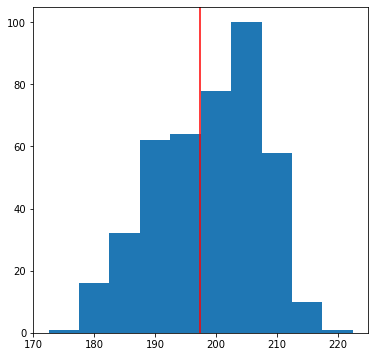

In [10]:
%run -i script.py players_stats.csv

# Publicación de los Datos

Utilizando la API de Zenodo

In [11]:
ACCESS_TOKEN = "rsLSkT4R9SW7mo86frMqY62aqDJImWKQNC3ilMQR53qtFDMvKscVck8jz6F2"
r = requests.get('https://zenodo.org/api/deposit/depositions',params={'access_token': ACCESS_TOKEN})
r.status_code
r.json()

[{'conceptdoi': '10.5281/zenodo.5997627',
  'conceptrecid': '5997627',
  'created': '2022-02-07T15:51:48.173158',
  'doi': '10.5281/zenodo.5997628',
  'doi_url': 'https://doi.org/10.5281/zenodo.5997628',
  'files': [{'checksum': 'c42097fbb10d4352080fbca4ffce0b46',
    'filename': 'script.py',
    'filesize': 255,
    'id': '3c13f3e9-24de-4cf6-bec2-1c63b901c87c',
    'links': {'download': 'https://zenodo.org/api/files/0205a96b-58fa-44a3-b575-737956a7493f/script.py',
     'self': 'https://zenodo.org/api/deposit/depositions/5997628/files/3c13f3e9-24de-4cf6-bec2-1c63b901c87c'}}],
  'id': 5997628,
  'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5997628.svg',
   'bucket': 'https://zenodo.org/api/files/63b7b30b-035f-4c10-bb7e-259fedcebfc9',
   'conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5997627.svg',
   'conceptdoi': 'https://doi.org/10.5281/zenodo.5997627',
   'discard': 'https://zenodo.org/api/deposit/depositions/5997628/actions/discard',
   'doi': 'https:

In [12]:
deposition_id = "5997627"
data = {'name': 'heights.png'}
files = {'file': open('script.py', 'r')}
r = requests.post('https://zenodo.org/api/deposit/depositions/%s/files' % deposition_id,
                  params={'access_token': ACCESS_TOKEN},
                  data=data,
                  files=files)
r.status_code

403

In [13]:
headers = {"Content-Type": "application/json"}
params = {'access_token': ACCESS_TOKEN}
r = requests.post('https://zenodo.org/api/deposit/depositions',
                   params=params,
                   json={},
                   headers=headers)
print(r.status_code)
r.json()

403


{'message': "You don't have the permission to access the requested resource. It is either read-protected or not readable by the server.",
 'status': 403}

Por algún motivo que no alcanzo a comprender, incluso intentándolo de dos maneras distintas, el servidor rechaza la conexión y no permite continuar la práctica. La primera está sacada de la ayuda proporcionada por el profesor (Workflow_resuelto2022.ipynb) y la segunda está sacada de un tutorial de Zenodo (https://developers.zenodo.org/). Ante la imposibilidad de continuar con la parte final de la práctica, ésta acaba aquí.